### Обзор данных<a class="anchor" id="course_project_review"></a>

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [198]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [199]:
TRAIN_DATASET_PATH = './course_project_train.csv'
TEST_DATASET_PATH = './course_project_test.csv'

In [200]:
PREP_DATASET_PATH = './PREPARED_DOLGOPOLOVA_TRAIN_CREDIT_DATASET_1.csv'
PREP_DATASET_PATH_TEST='./PREPARED_DOLGOPOLOVA_TEST_CREDIT_DATASET_1.csv'

In [201]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [202]:
df_train.shape

(7500, 17)

In [203]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [204]:
df_test.shape

(2500, 16)

In [205]:
df_train.iloc[0]

Home Ownership                            Own Home
Annual Income                             482087.0
Years in current job                           NaN
Tax Liens                                      0.0
Number of Open Accounts                       11.0
Years of Credit History                       26.3
Maximum Open Credit                       685960.0
Number of Credit Problems                      1.0
Months since last delinquent                   NaN
Bankruptcies                                   1.0
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                     99999999.0
Current Credit Balance                     47386.0
Monthly Debt                                7914.0
Credit Score                                 749.0
Credit Default                                   0
Name: 0, dtype: object

In [206]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [207]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [208]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

### Приведение типов

Посмотрим по признаку Банкротство сколько там видов данных, чтобы изучить признак и отнести его к количественным или категориальным

In [209]:
df_train['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

Банкротство отнесем к количественным признакам

Признак Years in current job имеет тип object, однако является важным для анализа, чем выше стаж у человека, тем он более благонадежен, поэтому его нужно перевести в int

In [210]:
df_train['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [211]:
df_train['Years in current job'].astype

<bound method NDFrame.astype of 0             NaN
1       10+ years
2         8 years
3         6 years
4         8 years
          ...    
7495     < 1 year
7496       1 year
7497      6 years
7498          NaN
7499      4 years
Name: Years in current job, Length: 7500, dtype: object>

In [212]:
df_train["Years in current job"] = pd.to_numeric(df_train["Years in current job"].astype(str).str.replace(r"[^\d\-]", ""), errors="coerce")


In [213]:
df_train['Years in current job'].value_counts()

10.0    2332
1.0     1067
2.0      705
3.0      620
5.0      516
4.0      469
6.0      426
7.0      396
8.0      339
9.0      259
Name: Years in current job, dtype: int64

In [214]:
df_train['Years in current job'].iloc[1]

10.0

In [215]:
df_train['Credit Score'].value_counts()

740.0     169
747.0     168
748.0     157
745.0     152
742.0     151
         ... 
616.0       1
6600.0      1
629.0       1
6820.0      1
6060.0      1
Name: Credit Score, Length: 268, dtype: int64

In [216]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   float64
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

### Обзор данных<a class="anchor" id="review"></a>

**Обзор целевой переменной**

In [217]:
df_train['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

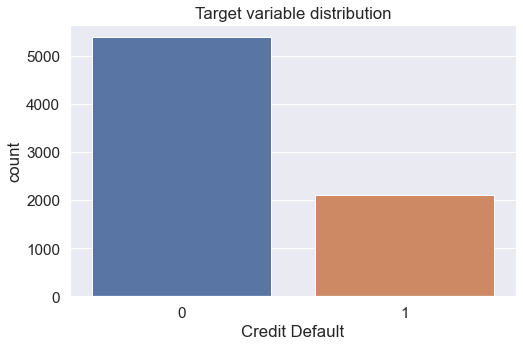

In [218]:
plt.figure(figsize=(8, 5))

sns.countplot('Credit Default', data=df_train)

plt.title('Target variable distribution')
plt.show()

**Обзор количественных признаков**

In [219]:
df_train.describe()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7129.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,5.959321,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,3.499844,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,1.000000,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,3.000000,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,6.000000,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,10.000000,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,10.000000,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [220]:
for num_colname in df_train.select_dtypes(include='float64').columns:
    print(str(num_colname) + '\n\n' + str(df_train[num_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Annual Income

1338113.0    4
969475.0     4
1161660.0    4
1043651.0    4
1058376.0    4
            ..
1272316.0    1
712082.0     1
695476.0     1
678889.0     1
402192.0     1
Name: Annual Income, Length: 5478, dtype: int64
****************************************************************************************************

Years in current job

10.0    2332
1.0     1067
2.0      705
3.0      620
5.0      516
4.0      469
6.0      426
7.0      396
8.0      339
9.0      259
Name: Years in current job, dtype: int64
****************************************************************************************************

Tax Liens

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
6.0       2
5.0       2
7.0       1
Name: Tax Liens, dtype: int64
****************************************************************************************************

Number of Open Accounts

9.0     728
11.0    692
10.0    677
8.0     638
7.0     613
12.0    562
6.0     504
13.0    465
14.0    420
5.0

**Обзор номинативных признаков**

In [221]:
for cat_colname in df_train.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df_train[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64
****************************************************************************************************

Term

Short Term    5556
Long Term     1944
Name: Term, dtype: int64
****************************************************************************************************



### Обработка пропусков<a class="anchor" id="gaps"></a>

In [222]:
len(df_train) - df_train.count()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

#### Заменим пропуски медианой в количественных признаках

In [223]:
df_train['Annual Income']=df_train['Annual Income'].fillna(df_train['Annual Income'].median())
df_train['Annual Income'].isna().sum()

0

In [224]:
df_train['Years in current job']=df_train['Years in current job'].fillna(df_train['Years in current job'].median())
df_train['Years in current job'].isna().sum()

0

In [225]:
df_train['Months since last delinquent']=df_train['Months since last delinquent'].fillna(df_train['Months since last delinquent'].median())
df_train['Months since last delinquent'].isna().sum()

0

In [226]:
df_train['Bankruptcies']=df_train['Bankruptcies'].fillna(df_train['Bankruptcies'].median())
df_train['Bankruptcies'].isna().sum()

0

In [227]:
df_train['Credit Score']=df_train['Credit Score'].fillna(df_train['Credit Score'].median())
df_train['Credit Score'].isna().sum()

0

In [228]:
df_train.isna().sum()

Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Credit Default                  0
dtype: int64

### Обработка выбросов<a class="anchor" id="gaps"></a>

In [229]:
df_train_num_features=df_train.select_dtypes(include=['float64'])
df_train_num_features.describe()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7.500000e+03,7500.000000,7500.000000
mean,1.325286e+06,5.961333,0.030133,11.130933,18.317467,9.451537e+05,0.170000,33.227467,0.116933,1.187318e+07,2.898332e+05,18314.454133,1063.877333
std,7.567551e+05,3.412183,0.271604,4.908924,7.041946,1.602622e+07,0.498598,14.703950,0.346904,3.192612e+07,3.178714e+05,11926.764673,1438.335832
min,1.645970e+05,1.000000,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000
25%,9.311330e+05,3.000000,0.000000,8.000000,13.500000,2.792295e+05,0.000000,32.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,718.000000
50%,1.168386e+06,6.000000,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000
75%,1.499974e+06,10.000000,0.000000,14.000000,21.800000,7.935015e+05,0.000000,32.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,740.000000
max,1.014934e+07,10.000000,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000


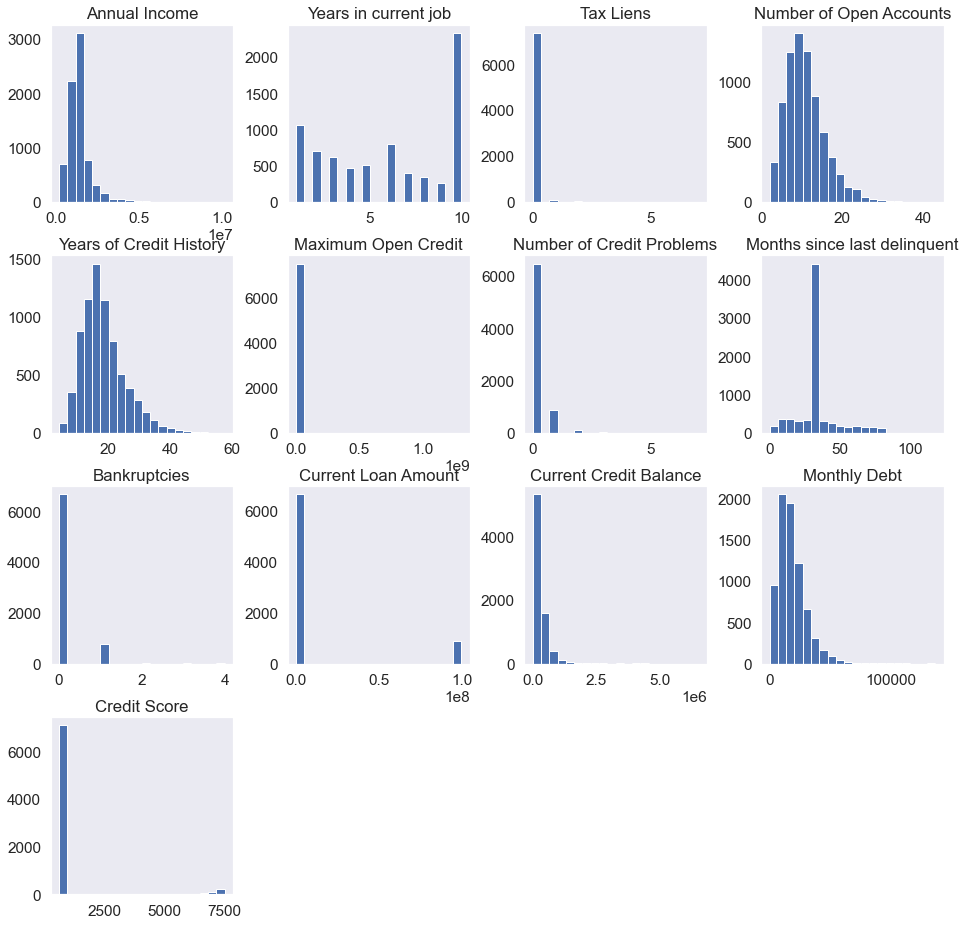

In [230]:
df_train_num_features.hist(figsize=(16,16),bins=20,grid=False);

Есть вероятность, что в Credit Score, в части данных были добавлены лишние ноли, поэтому все что выше квартиля 75% по Credit Score будем считать выбросом.

In [231]:
condition1=df_train['Credit Score']>1000.0
df_train.loc[condition1,'Credit Score']=df_train['Credit Score'].median()

Есть веротность, что Current Loan Amount есть выбросы по значению 99999999.0 посмотрим на графике

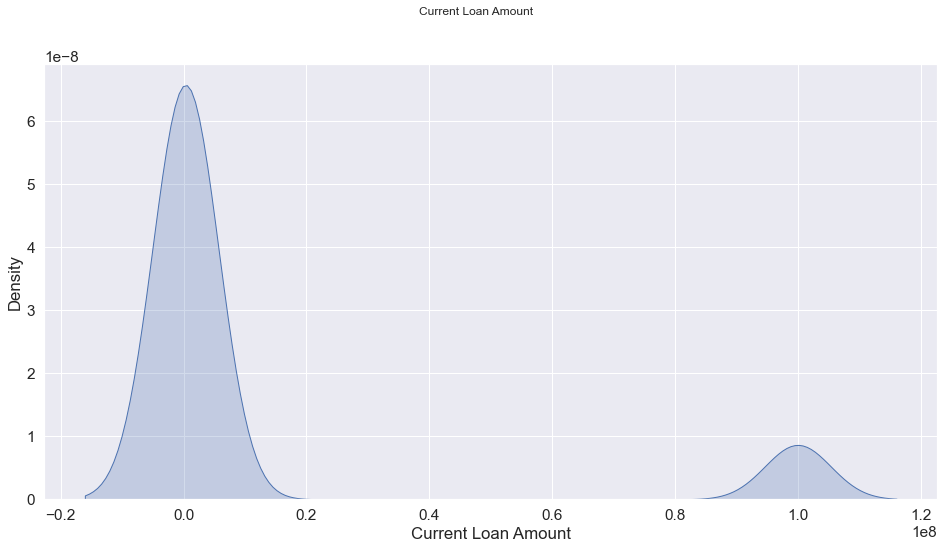

In [232]:
plt.figure(figsize = (16, 8))

sns.kdeplot(df_train['Current Loan Amount'], shade=True, legend=False)
plt.xlabel('Current Loan Amount')

plt.suptitle('Current Loan Amount')
plt.show()

Заменим значения по  признаку Current Loan Amount на медиану

In [233]:
condition2=df_train['Current Loan Amount']>8000000.0
df_train.loc[condition2,'Current Loan Amount']=df_train['Current Loan Amount'].median()

Исследуем и обработаем выбросы по Current Credit Balance и Monthly Debt

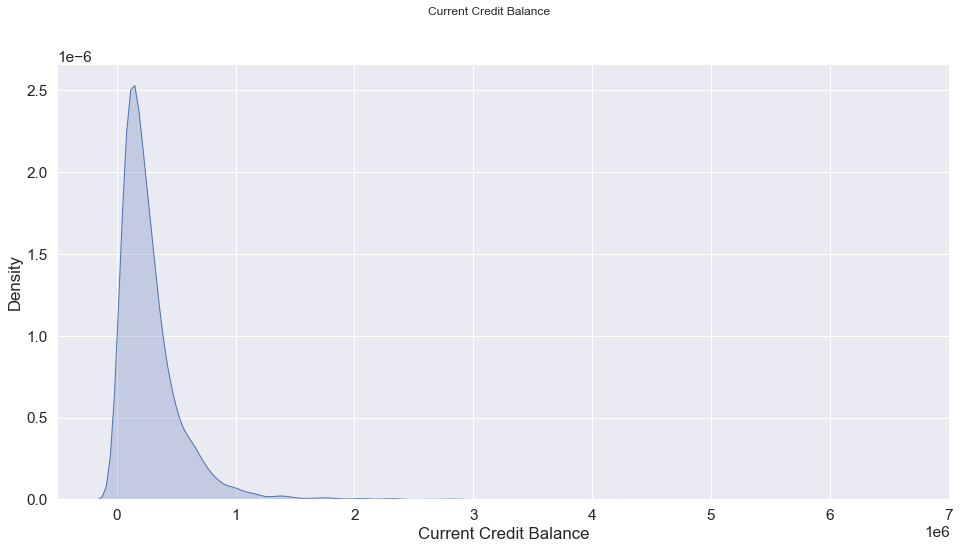

In [234]:
plt.figure(figsize = (16, 8))

sns.kdeplot(df_train['Current Credit Balance'], shade=True, legend=False)
plt.xlabel('Current Credit Balance')

plt.suptitle('Current Credit Balance')
plt.show()

Заменим значения по  признаку Current Credit Balancet на медиану

In [235]:
condition3=df_train['Current Credit Balance']>2500000.0
df_train.loc[condition3,'Current Credit Balance']=df_train['Current Credit Balance'].median()

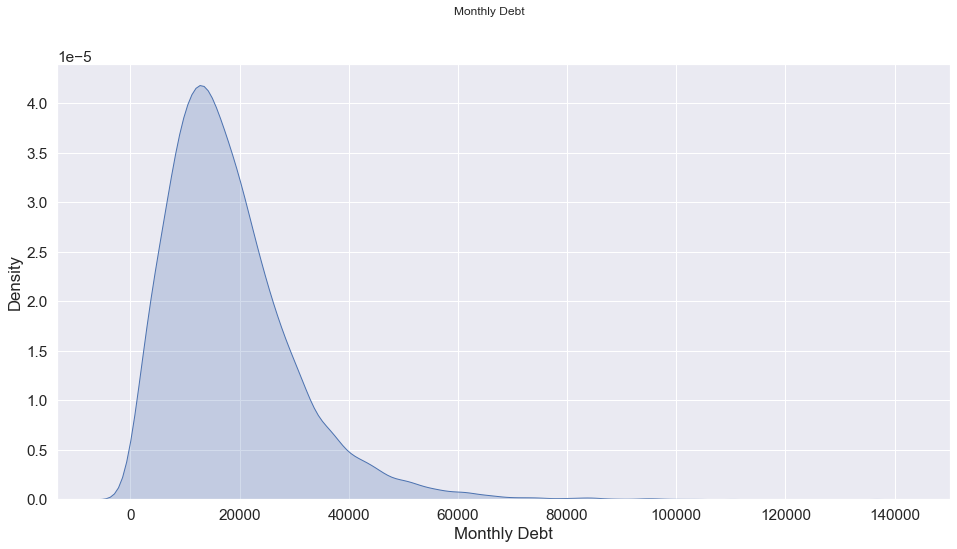

In [236]:
plt.figure(figsize = (16, 8))

sns.kdeplot(df_train['Monthly Debt'], shade=True, legend=False)
plt.xlabel('Monthly Debt')

plt.suptitle('Monthly Debt')
plt.show()

Заменим значения по  признаку Monthly Debt на медиану

In [237]:
condition4=df_train['Monthly Debt']>100000.0
df_train.loc[condition4,'Monthly Debt']=df_train['Monthly Debt'].median()

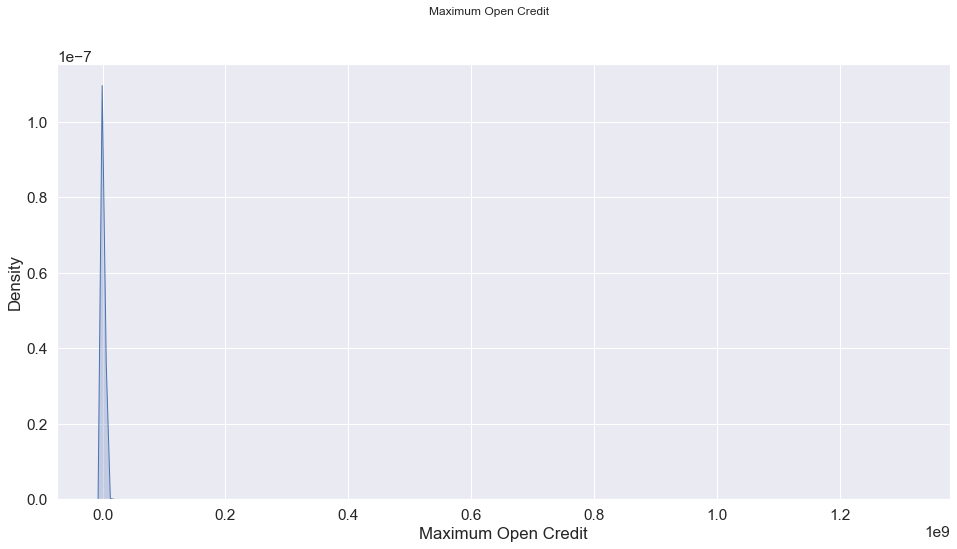

In [238]:
plt.figure(figsize = (16, 8))

sns.kdeplot(df_train['Maximum Open Credit'], shade=True, legend=False)
plt.xlabel('Maximum Open Credit')

plt.suptitle('Maximum Open Credit')
plt.show()

Заменим значения по  признаку Maximum Open Credit на медиану

In [239]:
condition5=df_train['Maximum Open Credit']>4000000.0
df_train.loc[condition5,'Maximum Open Credit']=df_train['Maximum Open Credit'].median()

In [240]:
df_train_num_features=df_train.select_dtypes(include=['float64'])
df_train_num_features.describe()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000
mean,1.325286e+06,5.961333,0.030133,11.130933,18.317467,6.087001e+05,0.170000,33.227467,0.116933,309088.029067,2.807278e+05,18262.879333,723.392000
std,7.567551e+05,3.412183,0.271604,4.908924,7.041946,4.991722e+05,0.498598,14.703950,0.346904,171393.740131,2.650706e+05,11720.887140,24.196917
min,1.645970e+05,1.000000,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,11242.000000,0.000000e+00,0.000000,585.000000
25%,9.311330e+05,3.000000,0.000000,8.000000,13.500000,2.792295e+05,0.000000,32.000000,0.000000,180169.000000,1.142565e+05,10067.500000,718.000000
50%,1.168386e+06,6.000000,0.000000,10.000000,17.000000,4.781535e+05,0.000000,32.000000,0.000000,309567.500000,2.093135e+05,16075.750000,731.000000
75%,1.499974e+06,10.000000,0.000000,14.000000,21.800000,7.811485e+05,0.000000,32.000000,0.000000,396929.500000,3.572998e+05,23787.000000,738.000000
max,1.014934e+07,10.000000,7.000000,43.000000,57.700000,3.979206e+06,7.000000,118.000000,4.000000,789030.000000,2.440246e+06,96177.000000,751.000000


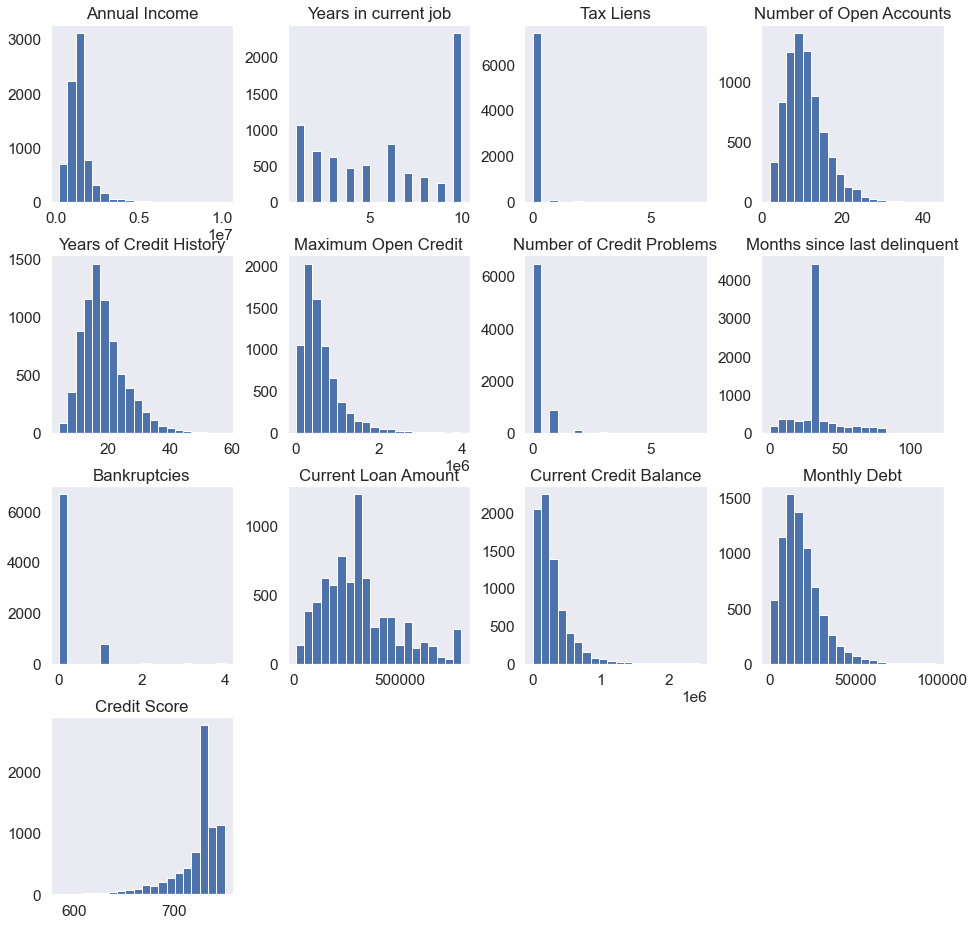

In [241]:
df_train_num_features.hist(figsize=(16,16),bins=20,grid=False);

#### Построение новых признаков (dummies)

Есть предположение, что срок (Term) кредита может влиять на целевую переменную

In [242]:
pd.get_dummies(df_train['Term']).rename(columns={'Short Term':'Short Term'}).rename(columns={'Long Term':'Long Term'}).astype(int)

,Long Term,Short Term
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
7495,0,1
7496,1,0
7497,0,1
7498,0,1


In [243]:
df_train=pd.concat([df_train,pd.get_dummies(df_train['Term']).rename(columns={'Short Term':'Short Term'}).rename(columns={'Long Term':'Long Term'})],axis=1)

In [244]:
df_train.drop(columns={'Term'}, axis=1, inplace=True)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Long Term,Short Term
0,Own Home,482087.0,6.0,0.0,11.0,26.3,685960.0,1.0,32.0,1.0,debt consolidation,309573.0,47386.0,7914.0,749.0,0,0,1
1,Own Home,1025487.0,10.0,0.0,15.0,15.3,1181730.0,0.0,32.0,0.0,debt consolidation,264968.0,394972.0,18373.0,737.0,1,1,0
2,Home Mortgage,751412.0,8.0,0.0,11.0,35.0,1182434.0,0.0,32.0,0.0,debt consolidation,309573.0,308389.0,13651.0,742.0,0,0,1
3,Own Home,805068.0,6.0,0.0,8.0,22.5,147400.0,1.0,32.0,1.0,debt consolidation,121396.0,95855.0,11338.0,694.0,0,0,1
4,Rent,776264.0,8.0,0.0,13.0,13.6,385836.0,1.0,32.0,0.0,debt consolidation,125840.0,93309.0,7180.0,719.0,0,0,1


In [245]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 7500 non-null   float64
 2   Years in current job          7500 non-null   float64
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  7500 non-null   float64
 9   Bankruptcies                  7500 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Current Loan Amount           7500 non-null   float64
 12  Current Credit Balance        7500 non-null   float64
 13  Mon

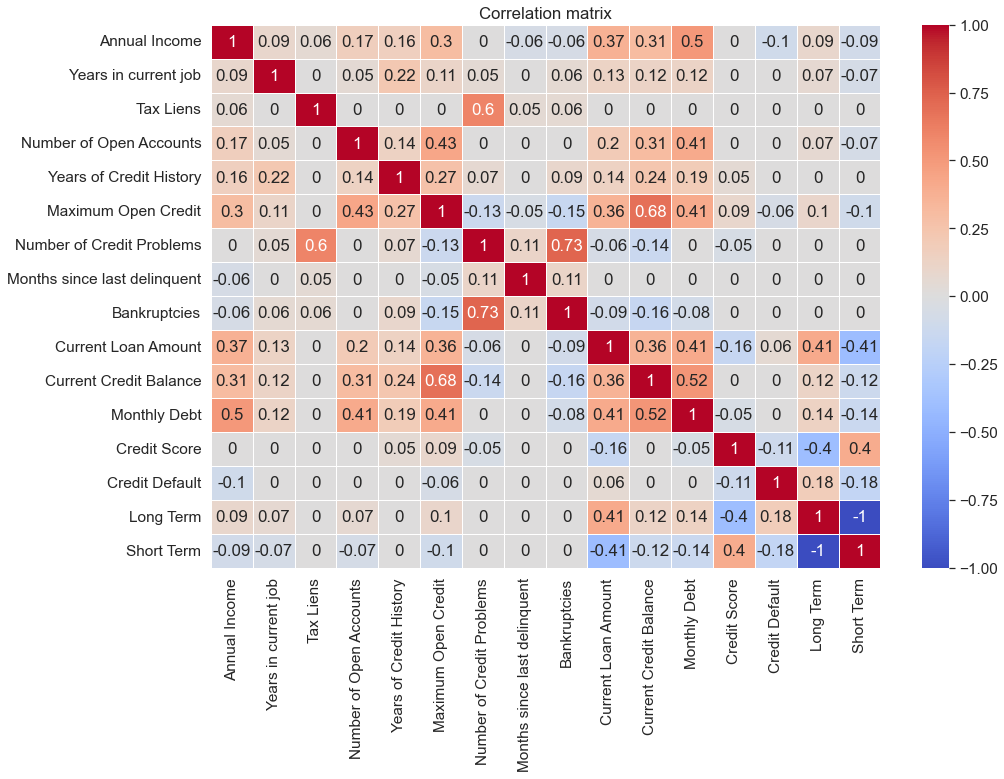

In [246]:
#Построим матрицу корреляций
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df_train.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.05] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

#### Сохранение датасета

In [247]:
import pickle

In [248]:
#df_train.to_csv('PREPARED_DOLGOPOLOVA_TRAIN_CREDIT_DATASET',index=False,encoding ='utf-8',sep=';')
df_train.to_csv(PREP_DATASET_PATH,index=False,encoding ='utf-8')

### Предобработка теста

In [249]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [250]:
df_test["Years in current job"] = pd.to_numeric(df_test["Years in current job"].astype(str).str.replace(r"[^\d\-]", ""), errors="coerce")


In [251]:
df_test['Years in current job'].value_counts()

10.0    810
1.0     360
3.0     228
2.0     212
5.0     169
4.0     152
7.0     140
6.0     137
8.0     107
9.0      99
Name: Years in current job, dtype: int64

In [252]:
pd.get_dummies(df_test['Term']).rename(columns={'Short Term':'Short Term'}).rename(columns={'Long Term':'Long Term'}).astype(int)

,Long Term,Short Term
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
2495,0,1
2496,0,1
2497,0,1
2498,0,1


In [253]:
df_test=pd.concat([df_test,pd.get_dummies(df_test['Term']).rename(columns={'Short Term':'Short Term'}).rename(columns={'Long Term':'Long Term'})],axis=1)

In [254]:
df_test.drop(columns={'Term'}, axis=1, inplace=True)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Long Term,Short Term
0,Rent,NaN,4.0,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,162470.0,105906.0,6813.0,NaN,0,1
1,Rent,231838.0,1.0,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,78298.0,46037.0,2318.0,699.0,0,1
2,Home Mortgage,1152540.0,3.0,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,200178.0,146490.0,18729.0,7260.0,0,1
3,Home Mortgage,1220313.0,10.0,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,217382.0,213199.0,27559.0,739.0,0,1
4,Home Mortgage,2340952.0,6.0,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,777634.0,425391.0,42605.0,706.0,1,0


In [255]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
    
    def transform(self, X):
        """Трансформация данных"""

         #Обработка пропусков
        # Annual Income
        X[['Annual Income']] = X[['Annual Income']].fillna(self.medians)
        
        # Years in current job
        X[['Years in current job']] = X[['Years in current job']].fillna(self.medians)
        
        # Months since last delinquent
        X[['Months since last delinquent']] = X[['Months since last delinquent']].fillna(self.medians)
        
        # Bankruptcies
        X[['Bankruptcies']] = X[['Bankruptcies']].fillna(self.medians)
        
        # Credit Score
        X[['Credit Score']] = X[['Credit Score']].fillna(self.medians)
        
        # Обработка выбросов
        #Credit Score
        condition1=X['Credit Score']>1000.0
        X.loc[condition1,'Credit Score']=self.medians['Credit Score']
        # Current Loan Amount
        condition2=X['Current Loan Amount']>8000000.0
        X.loc[condition2,'Current Loan Amount']=self.medians['Current Loan Amount']
        # Current Credit Balance
        condition3=X['Current Credit Balance']>2500000.0
        X.loc[condition3,'Current Credit Balance']=self.medians['Current Credit Balance']
        # Monthly Debt
        condition4=X['Monthly Debt']>100000.0
        X.loc[condition4,'Monthly Debt']=self.medians['Monthly Debt']
        # Maximum Open Credit
        condition5=X['Maximum Open Credit']>4000000.0
        X.loc[condition5,'Maximum Open Credit']=self.medians['Maximum Open Credit']
        
        return X

In [256]:
preprocessor = DataPreprocessing()

preprocessor.fit(df_test)
df_test= preprocessor.transform(df_test)
df_test.shape

(2500, 17)

In [257]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 2500 non-null   float64
 2   Years in current job          2500 non-null   float64
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  2500 non-null   float64
 9   Bankruptcies                  2500 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Current Loan Amount           2500 non-null   float64
 12  Current Credit Balance        2500 non-null   float64
 13  Mon

In [258]:
df_test_num_features=df_test.select_dtypes(include=['float64','uint8'])

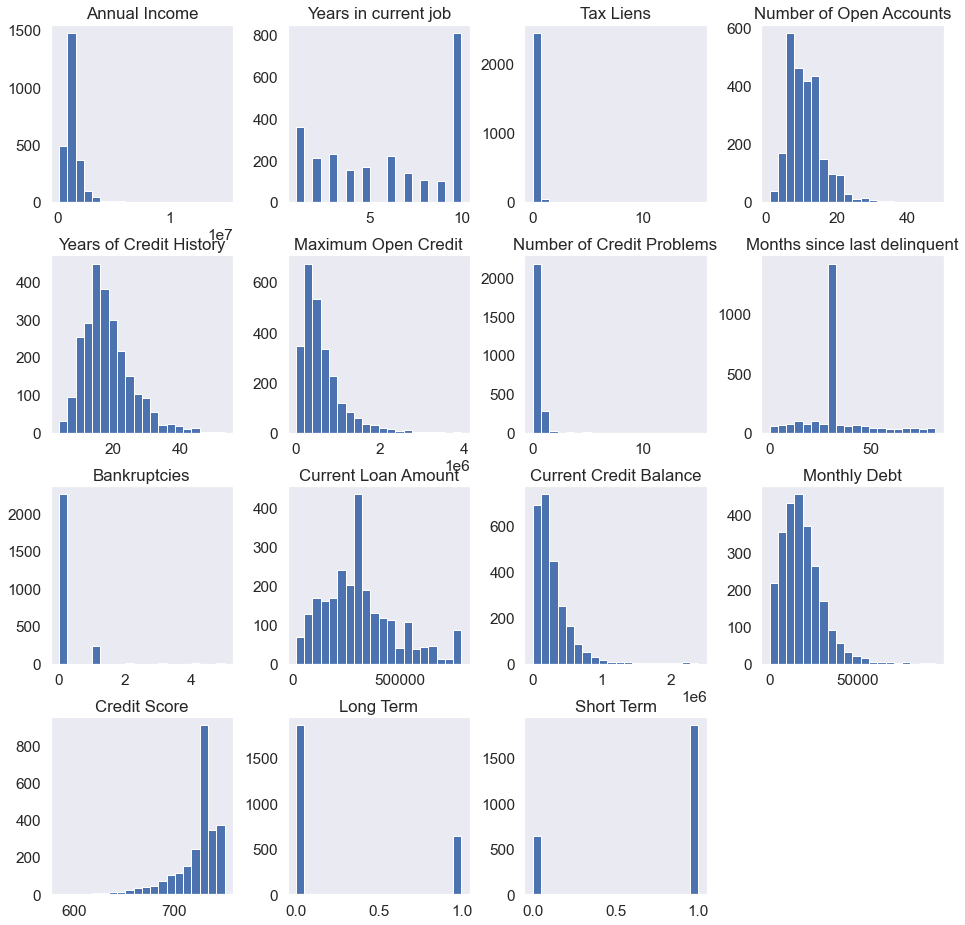

In [259]:
df_test_num_features.hist(figsize=(16,16),bins=20,grid=False);

In [260]:
df_test.describe()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Long Term,Short Term
count,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000
mean,1.328252e+06,6.034400,0.035200,11.184400,18.325920,6.138398e+05,0.162000,31.910000,0.106800,314016.832800,2.766346e+05,18271.340000,723.199200,0.255600,0.744400
std,8.211249e+05,3.443771,0.386291,4.852774,7.254659,5.071344e+05,0.559894,15.027103,0.356994,171498.178859,2.603641e+05,11543.881469,23.897932,0.436285,0.436285
min,1.065330e+05,1.000000,0.000000,1.000000,3.900000,0.000000e+00,0.000000,0.000000,0.000000,15422.000000,0.000000e+00,93.000000,585.000000,0.000000,0.000000
25%,9.365622e+05,3.000000,0.000000,8.000000,13.400000,2.785860e+05,0.000000,30.000000,0.000000,187126.500000,1.101145e+05,10024.750000,717.000000,0.000000,0.000000
50%,1.178475e+06,6.000000,0.000000,10.000000,17.000000,4.785440e+05,0.000000,30.000000,0.000000,322355.000000,2.073470e+05,16642.500000,731.000000,0.000000,1.000000
75%,1.488726e+06,10.000000,0.000000,14.000000,22.100000,7.854825e+05,0.000000,30.000000,0.000000,398893.000000,3.601925e+05,24146.000000,737.000000,1.000000,1.000000
max,1.497561e+07,10.000000,15.000000,48.000000,53.400000,3.946668e+06,15.000000,82.000000,5.000000,789096.000000,2.397724e+06,93555.000000,751.000000,1.000000,1.000000


#### Сохранение обработанного теста

In [261]:
df_test.to_csv(PREP_DATASET_PATH_TEST,index=False,encoding ='utf-8')
#df_test.to_csv('PREPARED_DOLGOPOLOVA_TEST_CREDIT_DATASET',index=False,encoding ='utf-8',sep=';')

### Анализ данных

In [262]:
from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

In [263]:
DATASET_PATH = './course_project_train.csv'
PREP_DATASET_PATH = './PREPARED_DOLGOPOLOVA_TRAIN_CREDIT_DATASET_1.csv'

In [264]:
df_base = pd.read_csv(DATASET_PATH)
df = pd.read_csv(PREP_DATASET_PATH)

df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Long Term,Short Term
0,Own Home,482087.0,6.0,0.0,11.0,26.3,685960.0,1.0,32.0,1.0,debt consolidation,309573.0,47386.0,7914.0,749.0,0,0,1
1,Own Home,1025487.0,10.0,0.0,15.0,15.3,1181730.0,0.0,32.0,0.0,debt consolidation,264968.0,394972.0,18373.0,737.0,1,1,0
2,Home Mortgage,751412.0,8.0,0.0,11.0,35.0,1182434.0,0.0,32.0,0.0,debt consolidation,309573.0,308389.0,13651.0,742.0,0,0,1
3,Own Home,805068.0,6.0,0.0,8.0,22.5,147400.0,1.0,32.0,1.0,debt consolidation,121396.0,95855.0,11338.0,694.0,0,0,1
4,Rent,776264.0,8.0,0.0,13.0,13.6,385836.0,1.0,32.0,0.0,debt consolidation,125840.0,93309.0,7180.0,719.0,0,0,1


**Выделение целевой переменной и групп признаков**

In [265]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df_base.columns.drop([TARGET_NAME, 'Term']).tolist()
NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES).tolist()

In [266]:
BASE_FEATURE_NAMES

['Home Ownership',
 'Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Purpose',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score']

In [267]:
NEW_FEATURE_NAMES

['Long Term', 'Short Term']

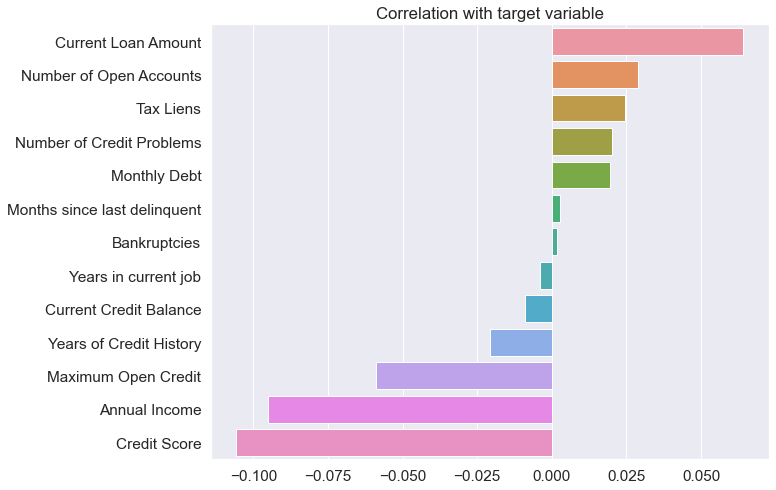

In [268]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

 **Оценка признака "Current Loan Amount" в разрезе целевой переменной** (CLA)

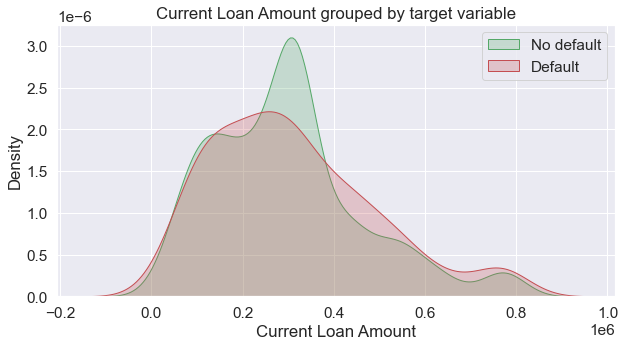

In [269]:
CLA_with_target_s = df[['Current Loan Amount', TARGET_NAME]].sample(1000,random_state=42)
CLA_s = CLA_with_target_s['Current Loan Amount']
CLA_target_0 = CLA_s[CLA_with_target_s[TARGET_NAME] == 0]
CLA_target_1 = CLA_s[CLA_with_target_s[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(CLA_target_0, shade=True, label='No default', color='g')
sns.kdeplot(CLA_target_1, shade=True, label='Default', color='r')

plt.xlabel('Current Loan Amount')
plt.title('Current Loan Amount grouped by target variable')
plt.legend()
plt.show()

*Проверка распределения признака на "нормальность" с помощью критерия Шапиро-Уилка*

**Наблюдение**

Похоже что две группы, полученные в результате разбиения признака "Current Loan Amount" по целевой переменной, имеют различные распределения, что может помочь при построение модели, т.к. это будет означать, что между признаком "Current Loan Amount" и целевой переменной, возможно, существует некоторая функциональная зависимость.

**Гипотеза** 
* Нулевая гипотеза: средние значения в двух независимых выборках равны
* Альтернативная гипотеза: средние значения в двух независимых выборках различаются
* Критерий: критерий Стьюдента (t-тест) и его аналоги
* Уровень значимости $\normalsize \alpha$: 0.05
* Критическая область: двухсторонняя

Что бы проверить данную гипотезу сравним две выборки из рассматриваемых групп на предмет равенства средних значений.
Если вероятность того, что мат. ожидания в исходных группах равны, при данных выборках, буде менее 5%, то можно будет говорить о том, что скорее всего выборки имеют различные распределения.

In [270]:
shapiro(CLA_s)

ShapiroResult(statistic=0.9413679242134094, pvalue=1.9333382264472208e-19)

По полученному значению p-value, которое сильно меньше 0.05, можем заключить, что гипотеза о "нормальности" отвергается.

#### Q-Q график

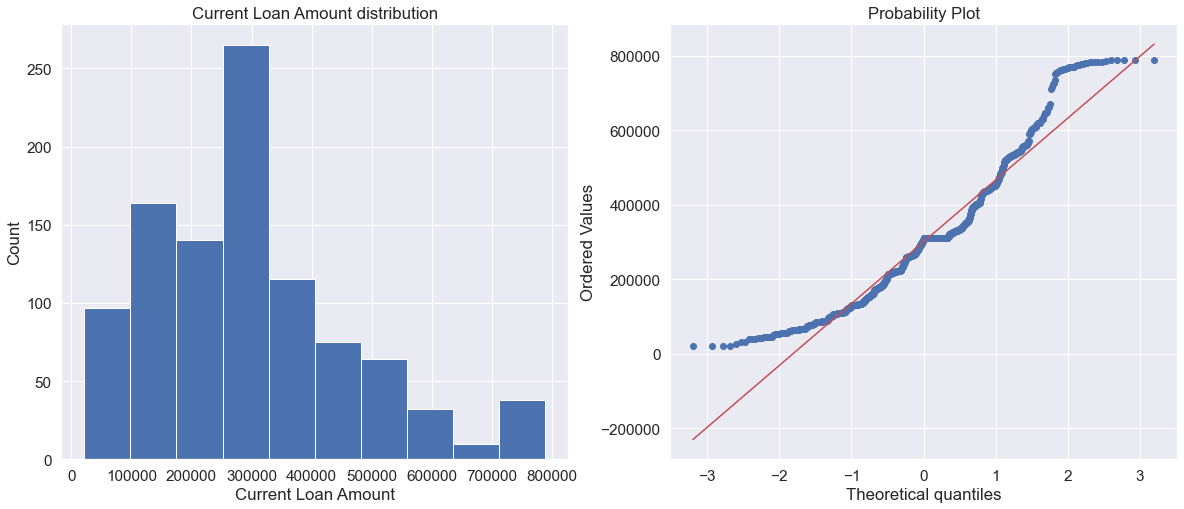

In [271]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('Current Loan Amount')
ax1.set_ylabel('Count')
ax1.set_title('Current Loan Amount distribution')
CLA_s.hist()

plt.subplot(122)
probplot(CLA_s, dist='norm', plot=plt)

plt.show()

*Оценим эквивалентность мат. ожадиний, в исследуемых группах, с помощью критерия Манна-Уитни*

In [272]:
mannwhitneyu(CLA_target_0, CLA_target_1)

MannwhitneyuResult(statistic=100643.5, pvalue=0.4217493471437582)

*Построим доверительные интервалы для средних значений, каждой из двух групп и сравним их*

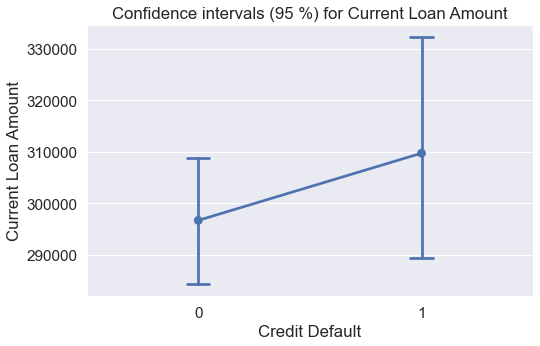

In [273]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='Current Loan Amount', data=CLA_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for Current Loan Amount')
plt.show()

#### Вывод: пересечения есть, поэтому признак Current Loan Amount может быть использован для анализа целевой переменной

In [274]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

In [275]:
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [276]:
import warnings
warnings.simplefilter('ignore')

In [277]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [278]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

#### Отбор признаков

In [279]:
NUM_FEATURE_NAMES = ['Annual Income','Years in current job','Tax Liens','Number of Open Accounts','Years of Credit History','Maximum Open Credit','Number of Credit Problems','Months since last delinquent','Bankruptcies','Current Loan Amount','Current Credit Balance','Monthly Debt','Credit Score']

CAT_FEATURE_NAMES = ['Home Ownership', 'Purpose']

SELECTED_FEATURE_NAMES = NUM_FEATURE_NAMES + NEW_FEATURE_NAMES

In [280]:
SELECTED_FEATURE_NAMES

['Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Long Term',
 'Short Term']

#### Приведение типов для модели CatBoost

In [281]:
for colname in CAT_FEATURE_NAMES:
    df[colname] = pd.Categorical(df[colname])
    
df[CAT_FEATURE_NAMES].dtypes

Home Ownership    category
Purpose           category
dtype: object

#### Нормализация данных

In [282]:
scaler = StandardScaler()

df_norm = df.copy()
df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])

df = df_norm.copy()

#### Разбиение на train и test

In [283]:
X = df[SELECTED_FEATURE_NAMES]
y = df[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)

#### Балансировка целевой переменной

In [284]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0    3771
1    2958
Name: Credit Default, dtype: int64

In [285]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

### Построение и оценка базовых моделей

**Логистическая регрессия**

In [286]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.63      0.80      0.71      3771
           1       0.62      0.40      0.49      2958

    accuracy                           0.63      6729
   macro avg       0.62      0.60      0.60      6729
weighted avg       0.62      0.63      0.61      6729

TEST

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1616
           1       0.43      0.38      0.41       634

    accuracy                           0.68      2250
   macro avg       0.60      0.59      0.59      2250
weighted avg       0.67      0.68      0.68      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1293  323
1                391  243


Показатели метрики F1 < 0.5Ю поэтому смотрим другие модели

**KNeighbors**

In [287]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      3771
           1       0.74      0.68      0.71      2958

    accuracy                           0.75      6729
   macro avg       0.75      0.75      0.75      6729
weighted avg       0.75      0.75      0.75      6729

TEST

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1616
           1       0.35      0.38      0.37       634

    accuracy                           0.63      2250
   macro avg       0.55      0.55      0.55      2250
weighted avg       0.64      0.63      0.63      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1169  447
1                390  244


На train уже более высокие показатели метрики F1, но на тесте еще низкие 

**Бустинговые алгоритмы**

*XGBoost*

In [288]:
model_xgb = xgb.XGBClassifier(random_state=21)
model_xgb.fit(X_train, y_train)

y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3771
           1       0.98      0.99      0.98      2958

    accuracy                           0.98      6729
   macro avg       0.98      0.98      0.98      6729
weighted avg       0.98      0.98      0.98      6729

TEST

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1616
           1       0.50      0.46      0.48       634

    accuracy                           0.72      2250
   macro avg       0.65      0.64      0.64      2250
weighted avg       0.71      0.72      0.71      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1322  294
1                343  291


На train переобучение, на тесте низкие показатели

*LightGBM*

In [289]:
model_lgbm = lgbm.LGBMClassifier(random_state=21)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3771
           1       0.93      0.88      0.91      2958

    accuracy                           0.92      6729
   macro avg       0.92      0.92      0.92      6729
weighted avg       0.92      0.92      0.92      6729

TEST

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1616
           1       0.50      0.46      0.48       634

    accuracy                           0.72      2250
   macro avg       0.65      0.64      0.64      2250
weighted avg       0.71      0.72      0.71      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1320  296
1                342  292


Результаты обучения данной модели уже лучше, но еще не перешли порог 0,5

CatBoost

In [290]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      3771
           1       0.92      0.85      0.88      2958

    accuracy                           0.90      6729
   macro avg       0.90      0.90      0.90      6729
weighted avg       0.90      0.90      0.90      6729

TEST

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1616
           1       0.51      0.48      0.50       634

    accuracy                           0.73      2250
   macro avg       0.66      0.65      0.65      2250
weighted avg       0.72      0.73      0.72      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1327  289
1                328  306


### Выбор лучшей модели и подбор гиперпараметров

In [291]:
model_catb = catb.CatBoostClassifier(class_weights=[1, 3.5], silent=True, random_state=21)

**Подбор гиперпараметров**

In [292]:
params = {'n_estimators':[50, 100, 200,250, 500, 700, 1000, 1200, 1500],
          'max_depth':[3, 5,6, 7]}

In [293]:
cv=KFold(n_splits=5, random_state=21, shuffle=True)

%%time

rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X, y)

In [294]:
#rs.best_params_

In [295]:
#rs.best_score_

In [296]:
%%time

final_model = catb.CatBoostClassifier(n_estimators=50, max_depth=5,
                                      silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      3771
           1       0.77      0.68      0.72      2958

    accuracy                           0.77      6729
   macro avg       0.77      0.76      0.76      6729
weighted avg       0.77      0.77      0.77      6729

TEST

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1616
           1       0.51      0.54      0.53       634

    accuracy                           0.73      2250
   macro avg       0.66      0.67      0.67      2250
weighted avg       0.73      0.73      0.73      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1294  322
1                293  341
CPU times: total: 469 ms
Wall time: 148 ms


Попробуем GridSearchCV

%%time
gs = GridSearchCV(model_catb, params, 
                  scoring='f1', # метрика 
                  cv=cv,
                  n_jobs=-1
                  )
gs.fit(X_train, y_train)

In [297]:
#gs.best_params_

In [298]:
#gs.best_score_

In [299]:
%%time

final_model = catb.CatBoostClassifier(n_estimators=1500, max_depth=7,
                                      silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3771
           1       0.96      0.93      0.95      2958

    accuracy                           0.95      6729
   macro avg       0.95      0.95      0.95      6729
weighted avg       0.95      0.95      0.95      6729

TEST

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1616
           1       0.52      0.46      0.49       634

    accuracy                           0.73      2250
   macro avg       0.66      0.65      0.65      2250
weighted avg       0.72      0.73      0.72      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1346  270
1                340  294
CPU times: total: 28 s
Wall time: 7.62 s


#### Вывод: из всех моделей лучший результат показала модель CatBoost с параметрами n_estimators=50 (RandomizedSearchCV), max_depth=5, метрика F1 превысила необходимый порог 0,5 

### Применение модели на тесте

In [300]:
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Long Term,Short Term
0,Rent,1178475.0,4.0,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,162470.0,105906.0,6813.0,731.0,0,1
1,Rent,231838.0,1.0,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,78298.0,46037.0,2318.0,699.0,0,1
2,Home Mortgage,1152540.0,3.0,0.0,10.0,13.7,204600.0,0.0,30.0,0.0,debt consolidation,200178.0,146490.0,18729.0,731.0,0,1
3,Home Mortgage,1220313.0,10.0,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,217382.0,213199.0,27559.0,739.0,0,1
4,Home Mortgage,2340952.0,6.0,0.0,11.0,23.6,1207272.0,0.0,30.0,0.0,debt consolidation,777634.0,425391.0,42605.0,706.0,1,0


In [301]:
SELECTED_FEATURE_NAMES

['Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Long Term',
 'Short Term']

In [302]:
df_test_preds=final_model.predict(df_test[SELECTED_FEATURE_NAMES])

In [303]:
result = pd.DataFrame()
result=pd.DataFrame({ 'Credit Default':pd.Series(df_test_preds)})

In [304]:
result.values

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [305]:
result.to_csv('PVDolgopolova_predictions.csv', index=False)

In [306]:
data_test=pd.read_csv('PVDolgopolova_predictions.csv')
data_test.head(10)

,Credit Default
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [307]:
data_test.value_counts()

Credit Default
0                 2498
1                    2
dtype: int64